Plant Disease Detection 
Access: open, available at New Plant Disease Dataset 

Data Description 

The data records contain 54,309 images. The images span 14 crop species: Apple, Blueberry, Cherry, Corn, Grape, Orange, Peach, Bell Pepper, Potato, Raspberry, Soybean, Squash, Strawberry, Tomato. In containes images of 17 fungal diseases, 4 bacterial diseases, 2 mold (oomycete) diseases, 2 viral disease, and 1 disease caused by a mite. 12 crop species also have images of healthy leaves that are not visibly affected by a disease  

Predictive task  

The predictive task can change depending on the images selected: one can predict plant disease vs plant good health or plant type.  

Related works:  

[1] Schuler, Joao Paulo Schwarz, et al. "Color-aware two-branch dcnn for efficient plant disease classification." MENDEL. Vol. 28. No. 1. 2022.  

[2] Mohanty, Sharada P., David P. Hughes, and Marcel Salathé. "Using deep learning for image-based plant disease detection." Frontiers in plant science 7 (2016): 1419.

In [80]:
!pip install opendatasets

import opendatasets as od
od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset/download?datasetVersionNumber=2")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Skipping, found downloaded files in "./new-plant-diseases-dataset" (use force=True to force download)



{"username":"guglielmotedeschi",


"key":"5306be7ca91268007d1f0059dbdb0b68"}

In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os



In [82]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.0.1+cu118
torchvision version: 0.15.2+cu118


In [83]:
train_dir = "/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir = "/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_dir = "/content/new-plant-diseases-dataset/test"
diseases = os.listdir(train_dir)

In [ ]:
print(diseases)

['Peach___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Tomato___Tomato_mosaic_virus', 'Corn_(maize)___healthy', 'Raspberry___healthy', 'Apple___healthy', 'Soybean___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Strawberry___Leaf_scorch', 'Pepper,_bell___Bacterial_spot', 'Grape___Black_rot', 'Tomato___Septoria_leaf_spot', 'Squash___Powdery_mildew', 'Blueberry___healthy', 'Grape___Esca_(Black_Measles)', 'Potato___healthy', 'Grape___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Common_rust_', 'Potato___Early_blight', 'Apple___Apple_scab', 'Pepper,_bell___healthy', 'Peach___Bacterial_spot', 'Strawberry___healthy', 'Tomato___Target_Spot', 'Tomato___healthy', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Cherry_(including_sour)___healthy', 'Apple___Black_rot', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Apple___Cedar_apple_rust', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Orange___Haungl

In [ ]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


In [ ]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [ ]:
print(f"Unique Plants are: \n{plants}")


Unique Plants are: 
['Peach', 'Cherry_(including_sour)', 'Tomato', 'Corn_(maize)', 'Raspberry', 'Apple', 'Soybean', 'Strawberry', 'Pepper,_bell', 'Grape', 'Squash', 'Blueberry', 'Potato', 'Orange']


In [ ]:
print("Number of plants: {}".format(len(plants)))


Number of plants: 14


In [ ]:
print("Number of diseases: {}".format(NumberOfDiseases))


Number of diseases: 26


In [ ]:
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

Text(0.5, 1.0, 'Images per each class of plant disease')

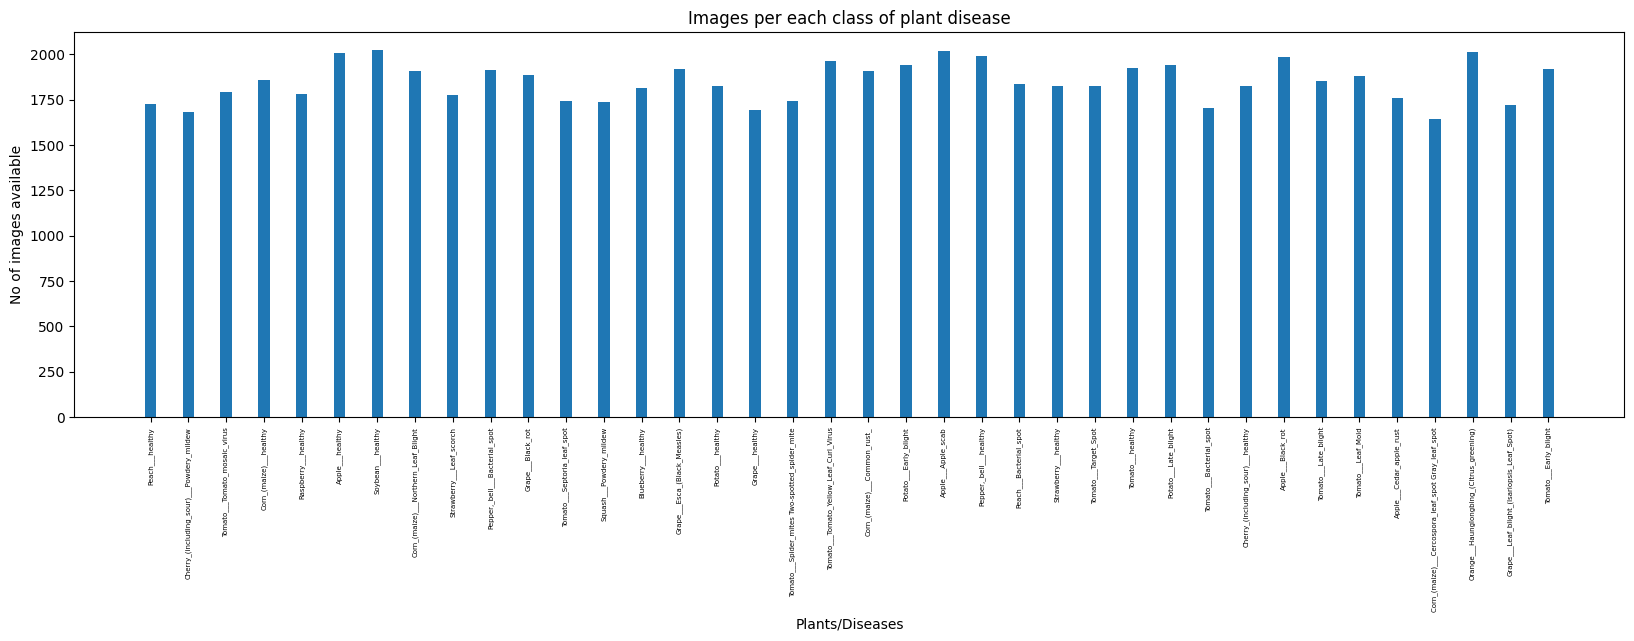

In [ ]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [ ]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 70295 images for training


Dataset

In [ ]:
from torchvision.datasets import ImageFolder  # for working with classes and images

train = ImageFolder(train_dir, transform=ToTensor()) # ToTensor images come as PIL format, we want to turn into Torch tensors
valid = ImageFolder(valid_dir, transform=ToTensor()) 
test = ImageFolder(test_dir, transform=ToTensor())

class_names= train.classes

In [ ]:
img, label = train[0]
print(img.shape, label)
print("n classes:",len(class_names))

torch.Size([3, 256, 256]) 0
n classes: 38


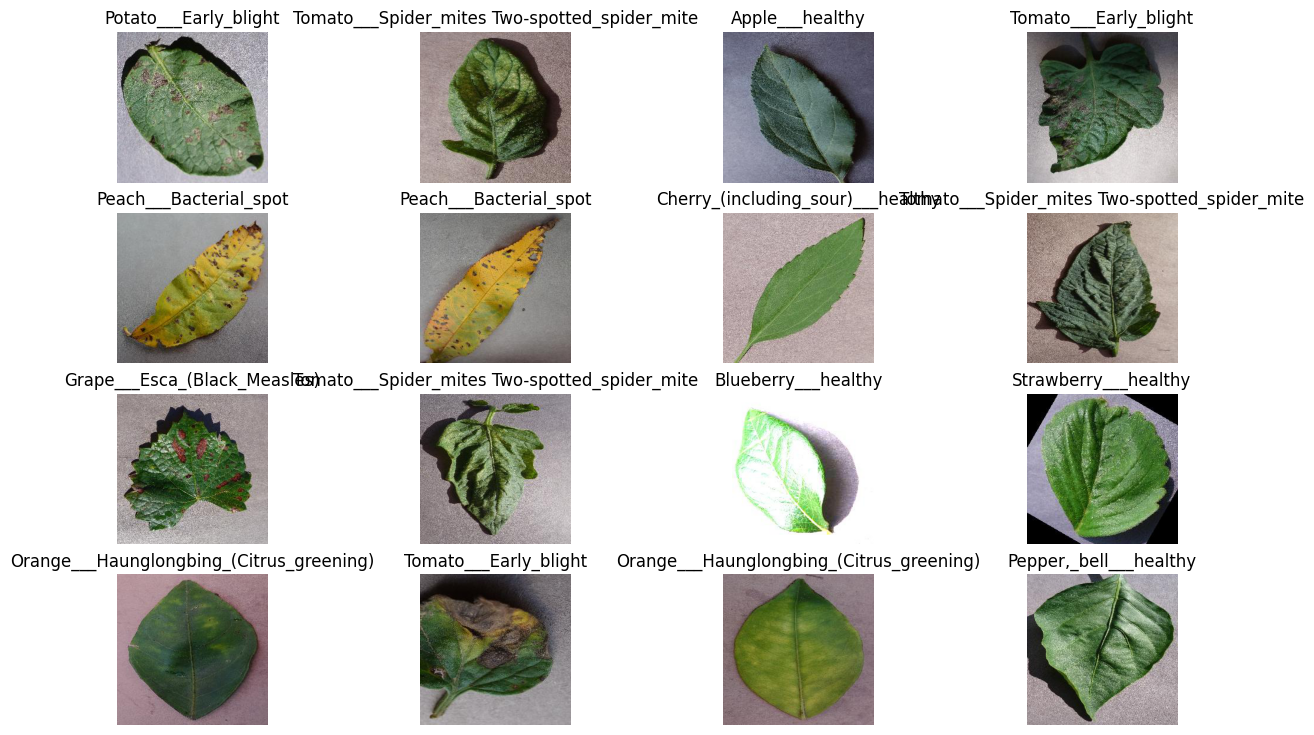

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train), size=[1]).item()
    img, label = train[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    plt.title(class_names[label])
    plt.axis(False);

Prepare a DataLoader

In [ ]:
random_seed = 7
torch.manual_seed(random_seed)

In [ ]:
from torch.utils.data import DataLoader # DataLoader permette di splittare il dataset in batches 

batch_size = 32

train_dl = DataLoader(train, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test, batch_size=batch_size, shuffle=False)

# Let's check out what we've created
print(f"Dataloaders: {train_dl, test_dl}") 
print(f"Length of train dataloader: {len(train_dl)} batches of {batch_size}")
print(f"Length of test dataloader: {len(test_dl)} batches of {batch_size}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f401b98c580>, <torch.utils.data.dataloader.DataLoader object at 0x7f401b98ffd0>)
Length of train dataloader: 2197 batches of 32
Length of test dataloader: 2 batches of 32


Modelling
Building the model
